# Typical application of a permutation test: evaluation of the effect of a treatment

A permutation test is a type of non-parametric randomization test in which the null distribution
of a test statistic is estimated by randomly permuting the observations.


Permutation tests are highly attractive because they make no assumptions other than that the
observations are independent and identically distributed under the null hypothesis.

The main step to carry out to conduct a permutation test are the following:
1. Compute an observed statistic $t_{obs}$ on the data.
2. Use randomization to compute the distribution of $t$ under the null hypothesis:
>* Perform $N$ random permutations of the data.
>* For each sample of permuted data, $i$, compute
the statistic $t_i$.
>* This procedure provides the distribution of $t$ under the null hypothesis$H_0$.
3. Compute the p-value as
$p = 𝑃(𝑡 > 𝑡_{𝑜𝑏𝑠} |𝐻_0) |\{𝑡_𝑖 > 𝑡_{𝑜𝑏𝑠}\}|$
where the $t_i$ values include $𝑡_{𝑜𝑏𝑠}$.

# Evaluation of the effect of a treatment


To compare two teaching methods or the effect of a drug or a treatment typically two samples are considered, one undergone the treatment and the other one not.

A typical example can be formulated as follows.

We have two groups of subjects, with 10 subjects for each group. The first (group A) has undergone a diet program A (Diet_A), whereas the second one (group B) to a different diet program (Diet_B).   

To test whether Diet_B is more effective than Diet_A, the difference in weight (Delta_weight_i) is recoded for each subject.  






Let us suppose that we have a situation in which none of the standard mathematical statistical approximations apply. We have computed a test statistic, such as the difference in mean Delta_weight, but do not have a useful approximation, such as that provided by the Central Limit Theorem.

Permutation tests can be useful in these scenarios.

# Test a summary statistic: the difference between the mean weight loss

We have identified a sample statistic to test the effect of Diet_A vs. Diet_B, which is the difference between the sample means of weight loss.

The weight difference (in kg) is recorded for each participant after 2 weeks of diet.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#we can use the following line to simulate an array of values:
#np.random.normal(-1.6, 1, size=10) #

In [3]:
Delta_weight_A= np.array([-1.13,  0.73, -1.23,  0.37, -0.58, -0.76, -2.49, -1.77, -2.84, 1.43])
Delta_weight_B= np.array([-0.56, -1.85, -1.17, -0.17, -1.89, -0.68, -1.44, -2.77, -0.79,-2.15])

We can visualize the data

(array([1., 0., 1., 2., 0., 1., 1., 1., 2., 1.]),
 array([-2.77, -2.51, -2.25, -1.99, -1.73, -1.47, -1.21, -0.95, -0.69,
        -0.43, -0.17]),
 <BarContainer object of 10 artists>)

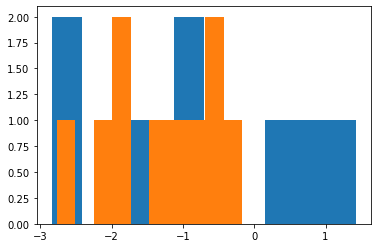

In [39]:
plt.hist(Delta_weight_A, bins=10)
plt.hist(Delta_weight_B, bins=10)

We observed the values above for each individual of the two group. We compute the mean weight differences for groups A and B, which suggests that Diet_B is more effective.

In [38]:
[Delta_weight_A.mean(), Delta_weight_B.mean()]

[-0.827, -1.347]

A difference is observed in the mean values of weigth differences between the two groups.

In [37]:
print(f'The average weight loss in group A is = {Delta_weight_A.mean() : .2f} kg')
print(f'The average weight loss in group B is = {Delta_weight_B.mean() : .2f} kg')
Avg_obs_diff = Delta_weight_A.mean() - Delta_weight_B.mean()
print(f'The difference between the mean values is = {Avg_obs_diff: .2f} kg')

The average weight loss in group A is = -0.83 kg
The average weight loss in group B is = -1.35 kg
The difference between the mean values is =  0.52 kg


Is that difference in mean statistically significant?

Permutation tests take advantage of the fact that if we randomly shuffle the group labels (group A and group B in our case), the resulting distribution of the statistic we consider approximates the null distribution.

The null hypothesis is that the Diet_B is not more effective than Diet_A.

The null distribution can be generated by shuffling the data 1000 times:

In [65]:
n_perm = 100000

We count the total number of subjects that we have

In [66]:
n_examples=Delta_weight_A.shape[0]+Delta_weight_B.shape[0]
print(n_examples)

20


and we put all examples in a same array

In [67]:
Delta_weight_all = np.append(Delta_weight_A, Delta_weight_B)
Delta_weight_all

array([-1.13,  0.73, -1.23,  0.37, -0.58, -0.76, -2.49, -1.77, -2.84,
        1.43, -0.56, -1.85, -1.17, -0.17, -1.89, -0.68, -1.44, -2.77,
       -0.79, -2.15])

We compute the test statistic "difference in mean" between Group A and Group B by randomly permuting the group labels.
This is achieved very simply, by reshuflfing many times (`n_perm`) the array with all examples, and assigning the first one half to  Group A and the second half to  Group B, and computing the mean.

In [68]:
# Create an empty list to store average differences for each permutation
Avg_diff_perm = []

# Iterate through each permutation
for i in range(n_perm):
    # Generate a random permutation of indices for the entire dataset (Delta_weight_all)
    perm_i = np.random.permutation(Delta_weight_all)
    
    # Calculate the average of the first portion corresponding to Delta_weight_A
    avg_A = perm_i[0:Delta_weight_A.shape[0]].mean()
    
    # Calculate the average of the second portion corresponding to Delta_weight_B
    avg_B = perm_i[Delta_weight_A.shape[0]:n_examples].mean()
    
    # Calculate and append the difference in averages to the list Avg_diff_perm
    Avg_diff_perm = np.append(Avg_diff_perm, avg_A - avg_B)

# Check the shape of the resulting array containing differences in averages for each permutation
Avg_diff_perm.shape

(100000,)

We obtained an array with the  differences between the means of the weight differences of the two groups under the null hypothesis.

In [63]:
type(Avg_diff_perm)

numpy.ndarray

We can plot the histogram

(array([   13.,    53.,   177.,   485.,  1006.,  1873.,  3077.,  4577.,
         6107.,  7799.,  9131., 10440., 10443., 10348.,  9111.,  7865.,
         6180.,  4566.,  3067.,  1858.,  1058.,   504.,   188.,    61.,
           13.]),
 array([-1.738  , -1.59896, -1.45992, -1.32088, -1.18184, -1.0428 ,
        -0.90376, -0.76472, -0.62568, -0.48664, -0.3476 , -0.20856,
        -0.06952,  0.06952,  0.20856,  0.3476 ,  0.48664,  0.62568,
         0.76472,  0.90376,  1.0428 ,  1.18184,  1.32088,  1.45992,
         1.59896,  1.738  ]),
 [<matplotlib.patches.Polygon at 0x7f564165dc60>])

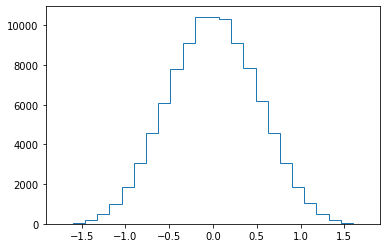

In [69]:
plt.hist(Avg_diff_perm, 25, histtype='step')

We add to the histogram a vertical red line indicating the measured difference in mean between the A and B groups (i.e. the difference in the mean values obtained with the correct group labels)

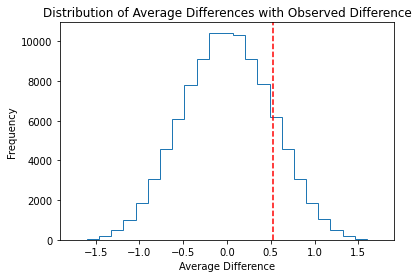

In [103]:
# Plot a histogram of the average differences for each permutation
# Parameters: Avg_diff_perm - array of differences, 25 bins, histtype='step' for a step-style histogram
plt.hist(Avg_diff_perm, 25, histtype='step')

# Add a vertical line at the observed average difference for reference
# Parameters: Avg_obs_diff - observed average difference, linestyle='--' for a dashed line, color='red'
plt.axvline(Avg_obs_diff, linestyle='--', color='red')

# Add a title to the plot
plt.title('Distribution of Average Differences with Observed Difference')

# Add labels to the x and y axes
plt.xlabel('Average Difference')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Explanation:

>1. `plt.hist(Avg_diff_perm, 25, histtype='step')`: Plot a histogram of the average differences for each permutation. The parameters specify the array of differences (`Avg_diff_perm`), the number of bins (25), and `histtype='step'` for a step-style histogram.

>2. `plt.axvline(Avg_obs_diff, linestyle='--', color='red')`: Add a vertical line at the observed average difference (`Avg_obs_diff`) for reference. The line has a dashed linestyle (`'--'`) and is colored red.

>3. `plt.title('Distribution of Average Differences with Observed Difference')`: Add a title to the plot for better understanding.

>4. `plt.xlabel('Average Difference')` and `plt.ylabel('Frequency')`: Add labels to the x and y axes to provide context for the plot.

>5. `plt.show()`: Display the plot.

This code snippet generates a histogram of the distribution of average differences for each permutation and adds a vertical dashed line at the observed average difference for comparison. The plot helps visualize where the observed difference falls within the distribution of differences generated by permutations.

## Evaluation of the empirical $p$-value

How many of the null means are bigger than the observed value? That proportion would be the $p$-value for the null hypothesis.

$p = \frac{r+1}{N+1}$

where $N$ is the number of permutations and r is the number of times that $t_i > t_{obs}$

We add a 1 to the numerator and denominator to account for misestimation of the p-value (see the reference "Permutation p-values should never be zero: calculating exact P-values when permutations are randomly drawn" https://pubmed.ncbi.nlm.nih.gov/21044043/ )


In [74]:
Avg_diff_perm[Avg_diff_perm > Avg_obs_diff].shape[0]

15784

In [79]:
p_value = (Avg_diff_perm[Avg_diff_perm > Avg_obs_diff].shape[0] + 1 )/ (n_perm +1)
print(f'The p value is p = {p_value:.3f}')
if p_value < 0.05:
  print('The difference between the mean weight loss of the two groups is statistically significant! ')
else:
  print('The null hypothesis cannot be rejected')

The p value is p = 0.158
The null hypothesis cannot be rejected


We can conclude that the Diet_B is not more effective that Diet_A.

# Test an arbitrary statistic: e.g. the 90th percentile

If we think that an appropriate test statistic for this problem is the difference between the 90th percentile, and if we knew the null distribution of this statistic, we could test for the null hypothesis that the statistic = 0. Permuting the labels of the 2 data sets allows us to create the empirical null distribution.

Let us suppose that we want to test whether the effect of Diet_A and Diet_B differ, regardless which possibly outperforms the other one. We have to carry out a two-tail test.

The procedure is the same as above, a slightly different code is proposed, where several permutations of the indices of the joint sample elements are computed, then data are assigned to either group A of group B and the test statistic is computed for all permutations.   

The `map()` function applies a given function to each item of an iterable (list, tuple etc.) and returns an iterator.

In [94]:
# Calculate the length of Delta_weight_A and store it in n1
n1 = len(Delta_weight_A)

# Calculate the lengths of Delta_weight_A and Delta_weight_B and store them in n1 and n2, respectively
n1, n2 = map(len, (Delta_weight_A, Delta_weight_B))

# Set the number of permutations to 1000
n_perm = 1000

# Concatenate Delta_weight_A and Delta_weight_B into a single array called data
data = np.concatenate([Delta_weight_A, Delta_weight_B])

# Generate n_perm permutations of indices for the concatenated data
# This creates a 2D array where each row contains a permutation of indices
ps = np.array([np.random.permutation(n1+n2) for i in range(n_perm)])


We can visualize the data with  [matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

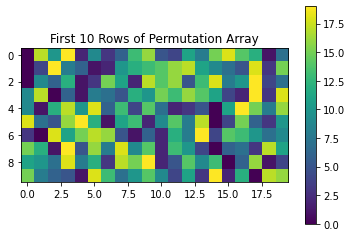

In [102]:
# Plot the first 10 rows of the permutation array (ps)
plt.imshow(ps[:10])

# Add a title to the plot
plt.title('First 10 Rows of Permutation Array')

# Add a colorbar to the plot for reference
plt.colorbar()

Explanation:
>1. `import matplotlib.pyplot as plt`: Import the `matplotlib` library for plotting and use `plt` as an alias.
>2. `plt.imshow(ps[:10])`: Display an image representation of the first 10 rows of the permutation array (`ps`). Each row corresponds to a permutation, and each column represents an index in the permutation.
>3. `plt.title('First 10 Rows of Permutation Array')`: Add a title to the plot for better understanding.
>4. `plt.colorbar()`: Add a colorbar to the plot. The colorbar provides a reference for the values represented by the colors in the plot.
>5. `plt.show()`: Display the plot.

This code snippet generates an image plot to visualize the first 10 rows of the permutation array. The colors in the plot represent the indices in the permutations, allowing you to visually inspect the patterns in the generated permutations.

In [107]:
# Select the first n1 columns of the permuted data for group A (Ap)
Ap = data[ps[:, :n1]]

# Select the remaining columns for group B (Bp)
Bp = data[ps[:, n1:]]

# Calculate the 90th percentile for each row in Ap and Bp, and compute the difference
# This will result in an array where each element represents the difference in the 90th percentiles
samples = np.percentile(Ap, 90, axis=1) - np.percentile(Bp, 90, axis=1)

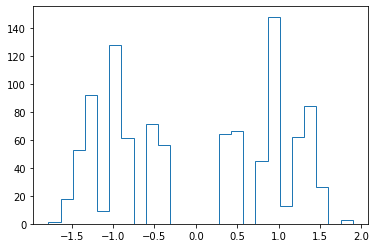

In [108]:
_ = plt.hist(samples, 25, histtype='step')

Explanation:

>1. `Ap = data[ps[:, :n1]]`: Extracts the first `n1` columns of the permuted data (`data`) based on the indices specified in the permutation array (`ps`). This creates a new array (`Ap`) representing the permuted data for group A.
>2. `Bp = data[ps[:, n1:]]`: Extracts the remaining columns of the permuted data for group B. This creates a new array (`Bp`) representing the permuted data for group B.
>3. `np.percentile(Ap, 90, axis=1)`: Calculates the 90th percentile along axis 1 (across columns) for each row in the array `Ap`. This gives the value at which 90% of the data in each row falls below.
>4. `np.percentile(Bp, 90, axis=1)`: Calculates the 90th percentile along axis 1 for each row in the array `Bp`. This gives the value at which 90% of the data in each row falls below for group B.
>5. `samples = np.percentile(Ap, 90, axis=1) - np.percentile(Bp, 90, axis=1)`: Computes the difference between the 90th percentiles of group A and group B for each row. The resulting array (`samples`) contains the differences in the 90th percentiles for each permutation.

p-value = 0.15


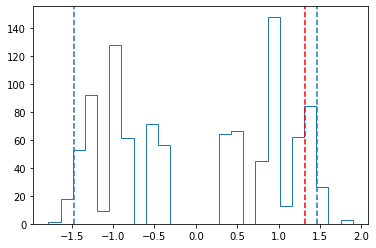

In [110]:
# Plot a histogram of the differences in 90th percentiles for each permutation
# Parameters: samples - array of differences, 25 bins, histtype='step' for a step-style histogram
plt.hist(samples, 25, histtype='step')

# Calculate the test statistic as the difference in 90th percentiles between Delta_weight_A and Delta_weight_B
test_stat = np.percentile(Delta_weight_A, 90) - np.percentile(Delta_weight_B, 90)

# Add a vertical line at the observed test statistic for reference
# Parameters: test_stat - observed test statistic, linestyle='--' for a dashed line, color='red'
plt.axvline(test_stat, linestyle='--', color='red')

# Add vertical lines at the 2.5th and 97.5th percentiles of the permutation distribution for a 95% confidence interval
plt.axvline(np.percentile(samples, 2.5), linestyle='--')
plt.axvline(np.percentile(samples, 97.5), linestyle='--')

# Check the direction of the test statistic to determine the appropriate tail for the p-value calculation
if test_stat > 0:
    # Calculate and print the p-value for a one-sided test (right tail)
    print(f"p-value = {2*(np.sum(samples > test_stat)+1)/(n_perm+1):.2f}")
else:
    # Calculate and print the p-value for a one-sided test (left tail)
    print(f"p-value = {2*(np.sum(samples < test_stat)+1)/(n_perm+1):.2f}")

# Show the plot
plt.show()

Explanation:

>1. `plt.hist(samples, 25, histtype='step')`: Plot a histogram of the differences in 90th percentiles for each permutation. The parameters specify the array of differences (`samples`), the number of bins (25), and `histtype='step'` for a step-style histogram.
>2. `test_stat = np.percentile(Delta_weight_A, 90) - np.percentile(Delta_weight_B, 90)`: Calculate the test statistic as the difference in the 90th percentiles between the original data for groups A and B.
>3. `plt.axvline(test_stat, linestyle='--', color='red')`: Add a vertical dashed line at the observed test statistic for reference.
>4. `plt.axvline(np.percentile(samples, 2.5), linestyle='--')` and `plt.axvline(np.percentile(samples, 97.5), linestyle='--')`: Add vertical dashed lines at the 2.5th and 97.5th percentiles of the permutation distribution to create a 95% confidence interval.
>5. The conditional statements check the direction of the test statistic to determine whether to perform a one-sided test for either the right tail or left tail.
>6. The corresponding p-value is calculated based on the permutation distribution, and the result is printed.
>7. `plt.show()`: Display the plot.